In [85]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay0 

Load Dataset

In [86]:
df = pd.read_csv('fifa_world_cup_2022_tweets.csv')

In [87]:
df.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative


In [88]:
df.drop("Unnamed: 0", axis=1,inplace = True)
df.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative


In [94]:
print(df['Tweet'].iloc[0],"\n")
print(df['Tweet'].iloc[1],"\n")
print(df['Tweet'].iloc[2],"\n")
print(df['Tweet'].iloc[3],"\n")
print(df['Tweet'].iloc[4],"\n")

What are we drinking today @TucanTribe 
@MadBears_ 
@lkinc_algo 
@al_goanna 

#WorldCup2022 https://t.co/Oga3TzvG5h 

Amazing @CanadaSoccerEN  #WorldCup2022 launch video. Shows how much the face of Canada and our men’s national team have changed since our last World Cup entry in 1986.  Can’t wait to see these boys in action!

This is Canada: FIFA World Cup Opening Video https://t.co/7g73vvwtg8 

Worth reading while watching #WorldCup2022 https://t.co/1SQrNa2dYU 

Golden Maknae shinning bright

https://t.co/4AyZbzGTX4
#JeonJungkook #Jungkook #전정국 #정국 #JK #GoldenMaknae #bunny #Kookie #Jungshook #BTS #방탄소년단 #WorldCup2022 #FIFAKOOK 
@BTS_twt 

If the BBC cares so much about human rights, homosexual rights, and women rights then why not say these before the opening ceremony?? Why are they saying these during the opening ceremony?? Why did the BBC censor the #WorldCup2022 opening ceremony?? https://t.co/f72P03ZN2k 



Data preprocessing

In [95]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [97]:
df.text = df['Tweet'].apply(data_processing)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2888\1822834271.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.text = df['Tweet'].apply(data_processing)


In [98]:
df = df.drop_duplicates('Tweet')

In [99]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [100]:
df['Tweet'] = df['Tweet'].apply(lambda x: stemming(x))

C:\Users\DELL\AppData\Local\Temp\ipykernel_2888\2124647322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweet'] = df['Tweet'].apply(lambda x: stemming(x))


In [101]:
df.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative


In [102]:
print(df['Tweet'].iloc[0],"\n")
print(df['Tweet'].iloc[1],"\n")
print(df['Tweet'].iloc[2],"\n")
print(df['Tweet'].iloc[3],"\n")
print(df['Tweet'].iloc[4],"\n")

What are we drinking today @TucanTribe 
@MadBears_ 
@lkinc_algo 
@al_goanna 

#WorldCup2022 https://t.co/Oga3TzvG5h 

Amazing @CanadaSoccerEN  #WorldCup2022 launch video. Shows how much the face of Canada and our men’s national team have changed since our last World Cup entry in 1986.  Can’t wait to see these boys in action!

This is Canada: FIFA World Cup Opening Video https://t.co/7g73vvwtg8 

Worth reading while watching #WorldCup2022 https://t.co/1SQrNa2dYU 

Golden Maknae shinning bright

https://t.co/4AyZbzGTX4
#JeonJungkook #Jungkook #전정국 #정국 #JK #GoldenMaknae #bunny #Kookie #Jungshook #BTS #방탄소년단 #WorldCup2022 #FIFAKOOK 
@BTS_twt 

If the BBC cares so much about human rights, homosexual rights, and women rights then why not say these before the opening ceremony?? Why are they saying these during the opening ceremony?? Why did the BBC censor the #WorldCup2022 opening ceremony?? https://t.co/f72P03ZN2k 



In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22360 entries, 0 to 22523
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date Created     22360 non-null  object
 1   Number of Likes  22360 non-null  int64 
 2   Source of Tweet  22360 non-null  object
 3   Tweet            22360 non-null  object
 4   Sentiment        22360 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


In [104]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [105]:
df['polarity'] = df['Tweet'].apply(polarity)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2888\1597467048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'] = df['Tweet'].apply(polarity)


In [107]:
df.head(5)

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,polarity
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral,0.00000
1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive,0.23125
2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive,0.30000
3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive,0.50000
4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative,0.10000


In [108]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [109]:
df['sentiment'] = df['polarity'].apply(sentiment)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2888\952108687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['polarity'].apply(sentiment)


In [110]:
df.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,polarity,sentiment
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral,0.00000,Neutral
1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive,0.23125,Positive
2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive,0.30000,Positive
3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive,0.50000,Positive
4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative,0.10000,Positive


<Axes: xlabel='sentiment', ylabel='count'>

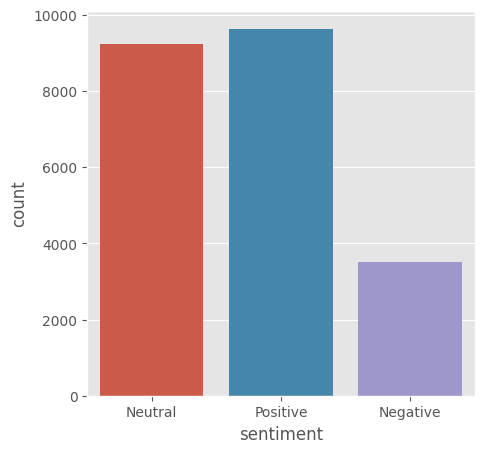

In [111]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = df)

Text(0.5, 1.0, 'Distribution of sentiments')

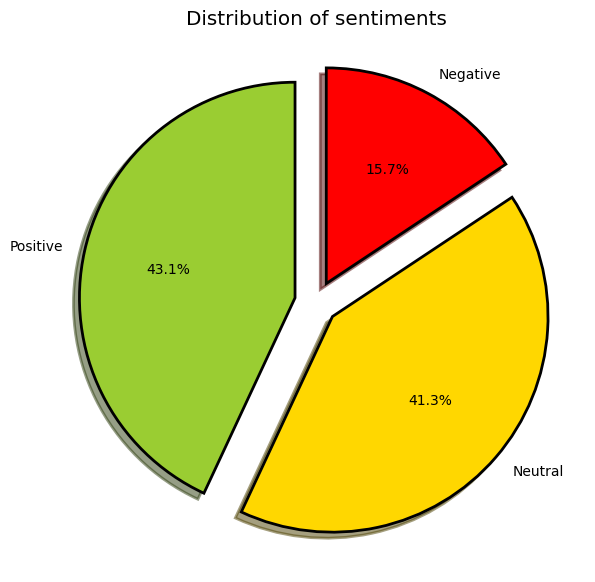

In [113]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [114]:
pos_tweets = df[df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,polarity,sentiment
17277,2022-11-20 12:47:13+00:00,32,Twitter for Android,It is the D day with the MSX Konami's moment\n...,positive,1.0,Positive
16966,2022-11-20 13:22:27+00:00,0,Twitter for Android,Opening ceremony FIFA World Cup\nWelcome Home ...,positive,1.0,Positive
5600,2022-11-20 16:25:27+00:00,0,Twitter Web App,The greatest degen play is happening now. #Wor...,positive,1.0,Positive
18308,2022-11-20 11:39:58+00:00,0,Twitter Web App,"Ukishika #FIFAWorldCup leo, jua tunashika the ...",positive,1.0,Positive
4314,2022-11-20 16:40:18+00:00,1,Twitter for iPhone,Twitter’s resolution for the #WorldCup2022 is ...,positive,1.0,Positive


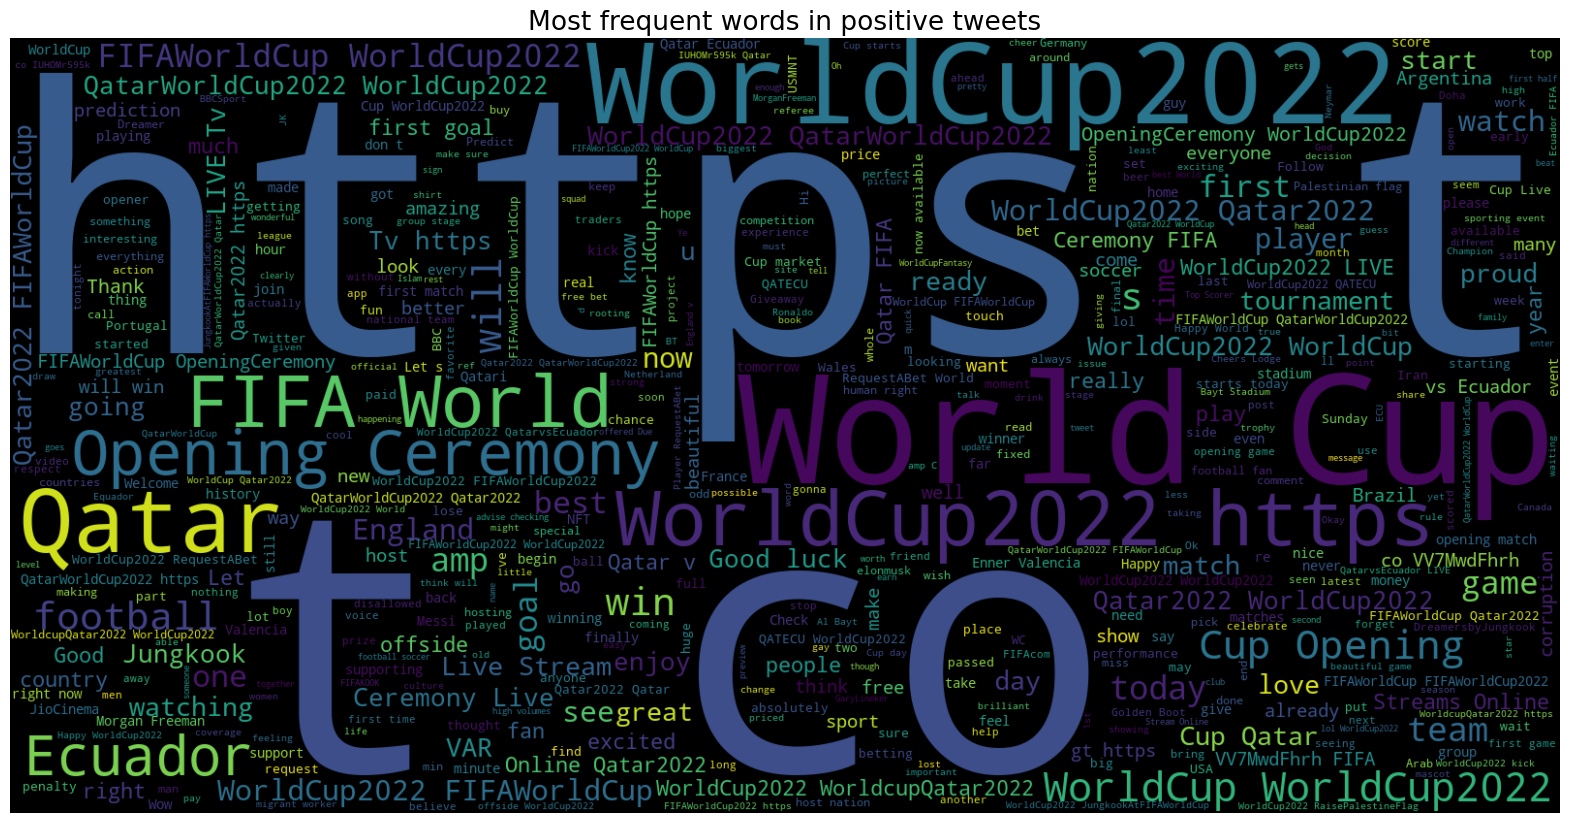

In [115]:
text = ' '.join([word for word in pos_tweets['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [117]:
neg_tweets = df[df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,polarity,sentiment
6148,2022-11-20 16:19:56+00:00,11,Twitter for iPhone,Fun fact : No host team in the 92 year histor...,neutral,-4.625929e-18,Negative
5476,2022-11-20 16:27:33+00:00,1,Twitter for Android,Didn't take long for the rolling over after mi...,negative,-5.551115e-18,Negative
12446,2022-11-20 15:44:22+00:00,0,Twitter for iPhone,"Fun fact: In the 92 year history, the World Cu...",positive,-9.251859e-18,Negative
14202,2022-11-20 15:15:02+00:00,3,Twitter for iPhone,#WorldCup2022 starts today Mexico plays on Tue...,neutral,-1.041667e-03,Negative
441,2022-11-20 22:33:35+00:00,1,Twitter for iPhone,I’ve never been less excited for a #WorldCup t...,negative,-1.190476e-03,Negative


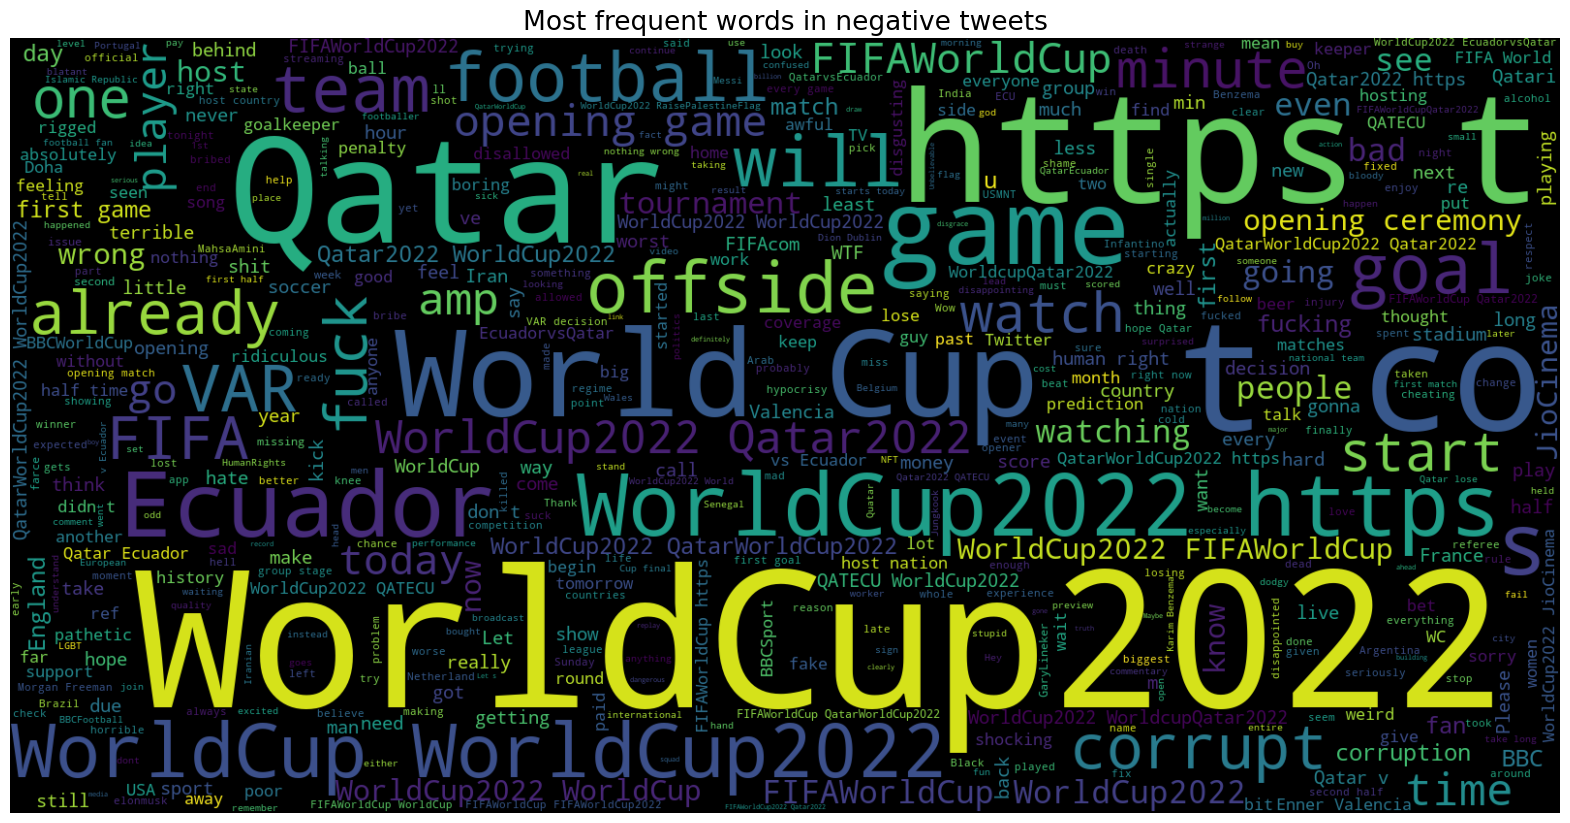

In [118]:
text = ' '.join([word for word in neg_tweets['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [119]:
neutral_tweets = df[df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,polarity,sentiment
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral,0.0,Neutral
15073,2022-11-20 15:01:02+00:00,0,Twitter for Android,Now watching #OpeningCeremony #FIFAWorldCup #Q...,neutral,0.0,Neutral
14617,2022-11-20 15:07:17+00:00,1,Twitter for iPhone,Goosebumps.\n#WorldCup2022,positive,0.0,Neutral
14618,2022-11-20 15:07:17+00:00,0,Twitter for iPhone,That Morgan Freeman narration 🙌🏾🙌🏾 #WorldCup2022,positive,0.0,Neutral
14619,2022-11-20 15:07:16+00:00,149,Twitter for Android,And so #WorldCup2022 begins....!,positive,0.0,Neutral


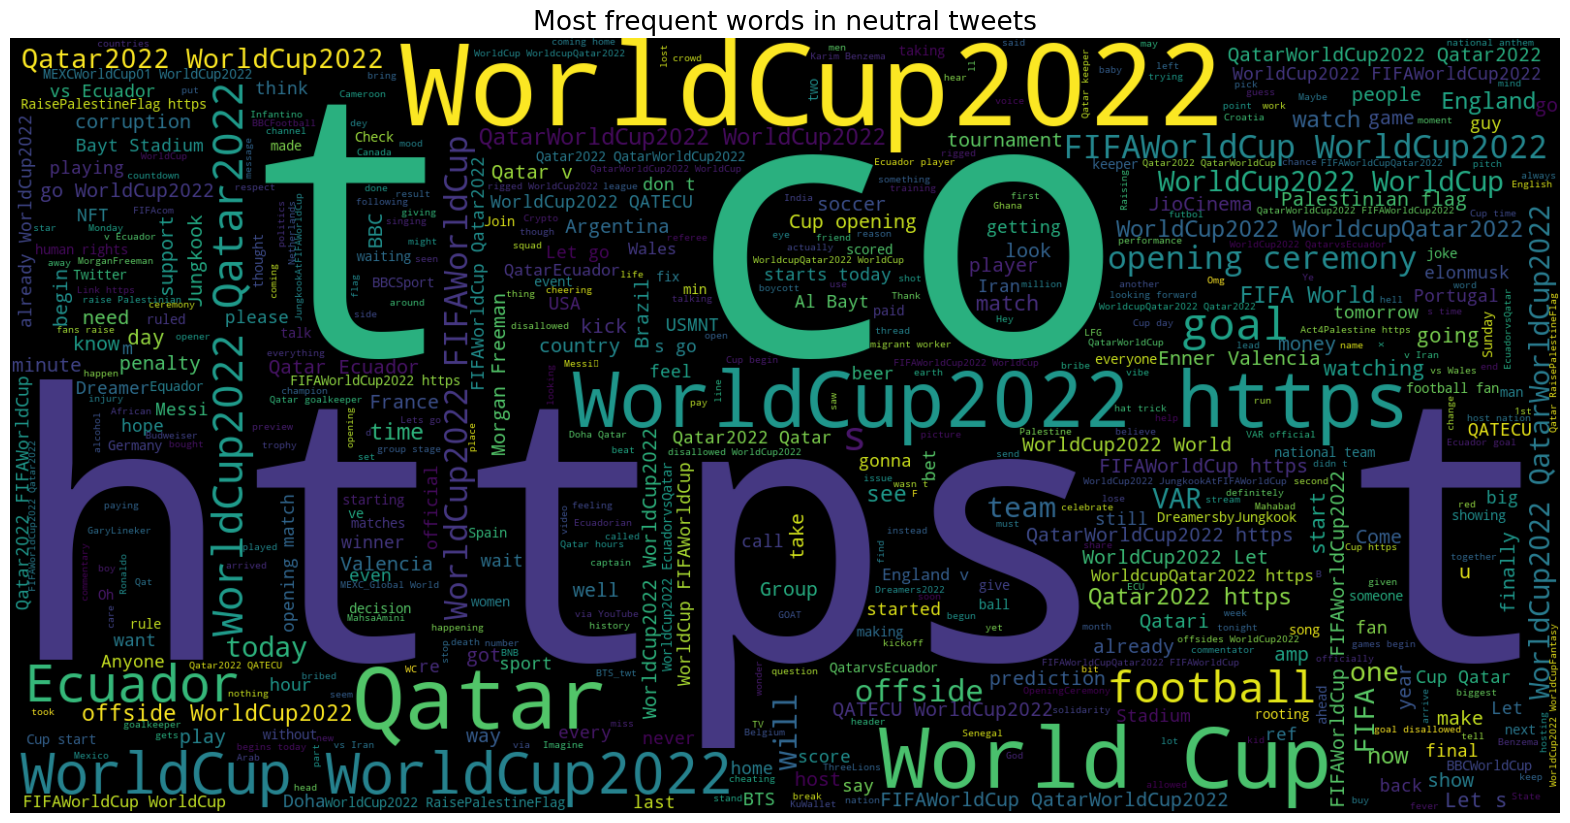

In [120]:
text = ' '.join([word for word in neutral_tweets['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [121]:
vect = CountVectorizer(ngram_range=(1,2)).fit(df['Tweet'])

In [122]:
X = df['Tweet']
Y = df['sentiment']
X = vect.transform(X)

In [123]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [124]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (17888, 196315)
Size of y_train: (17888,)
Size of x_test: (4472, 196315)
Size of y_test: (4472,)


In [125]:
import warnings
warnings.filterwarnings('ignore')

In [126]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 87.46%


In [127]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 436  156  111]
 [  24 1781   49]
 [  58  163 1694]]


              precision    recall  f1-score   support

    Negative       0.84      0.62      0.71       703
     Neutral       0.85      0.96      0.90      1854
    Positive       0.91      0.88      0.90      1915

    accuracy                           0.87      4472
   macro avg       0.87      0.82      0.84      4472
weighted avg       0.88      0.87      0.87      4472



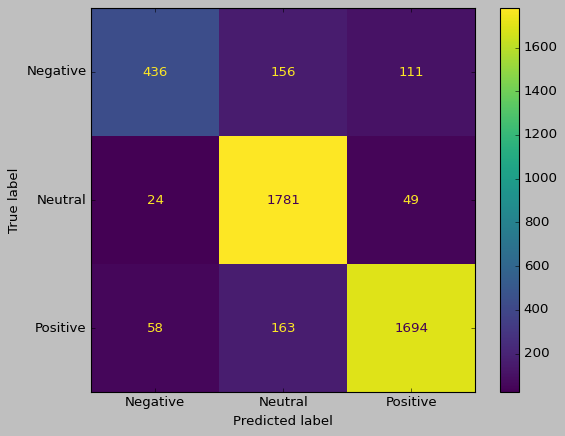

In [128]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [131]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [132]:
y_pred = grid.predict(x_test)

In [133]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 88.28%


In [134]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 461  138  104]
 [  25 1779   50]
 [  59  148 1708]]


              precision    recall  f1-score   support

    Negative       0.85      0.66      0.74       703
     Neutral       0.86      0.96      0.91      1854
    Positive       0.92      0.89      0.90      1915

    accuracy                           0.88      4472
   macro avg       0.87      0.84      0.85      4472
weighted avg       0.88      0.88      0.88      4472



In [135]:
from sklearn.svm import LinearSVC

In [136]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [137]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 89.51%


In [138]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 482  124   97]
 [  24 1787   43]
 [  54  127 1734]]


              precision    recall  f1-score   support

    Negative       0.86      0.69      0.76       703
     Neutral       0.88      0.96      0.92      1854
    Positive       0.93      0.91      0.92      1915

    accuracy                           0.90      4472
   macro avg       0.89      0.85      0.87      4472
weighted avg       0.90      0.90      0.89      4472



In [139]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [140]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 1}


In [141]:
y_pred = grid.predict(x_test)

In [142]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.51%


In [143]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 482  124   97]
 [  24 1787   43]
 [  54  127 1734]]


              precision    recall  f1-score   support

    Negative       0.86      0.69      0.76       703
     Neutral       0.88      0.96      0.92      1854
    Positive       0.93      0.91      0.92      1915

    accuracy                           0.90      4472
   macro avg       0.89      0.85      0.87      4472
weighted avg       0.90      0.90      0.89      4472



In [144]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
rclf= RandomForestClassifier()
rclf.fit(x_train, y_train)

RandomForestClassifier()

In [146]:
svc_pred = rclf.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 78.29%


In [147]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 196  262  245]
 [   5 1738  111]
 [  11  337 1567]]


              precision    recall  f1-score   support

    Negative       0.92      0.28      0.43       703
     Neutral       0.74      0.94      0.83      1854
    Positive       0.81      0.82      0.82      1915

    accuracy                           0.78      4472
   macro avg       0.83      0.68      0.69      4472
weighted avg       0.80      0.78      0.76      4472



In [148]:
from sklearn.naive_bayes import BernoulliNB

In [149]:
NB= BernoulliNB()
NB.fit(x_train, y_train)

BernoulliNB()

In [150]:
svc_pred = NB.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 65.61%


In [151]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[  32  399  272]
 [   2 1731  121]
 [  11  733 1171]]


              precision    recall  f1-score   support

    Negative       0.71      0.05      0.09       703
     Neutral       0.60      0.93      0.73      1854
    Positive       0.75      0.61      0.67      1915

    accuracy                           0.66      4472
   macro avg       0.69      0.53      0.50      4472
weighted avg       0.68      0.66      0.61      4472



In [152]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [154]:
svc_pred = model.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 83.70%


In [155]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 417  131  155]
 [  38 1706  110]
 [ 129  166 1620]]


              precision    recall  f1-score   support

    Negative       0.71      0.59      0.65       703
     Neutral       0.85      0.92      0.88      1854
    Positive       0.86      0.85      0.85      1915

    accuracy                           0.84      4472
   macro avg       0.81      0.79      0.80      4472
weighted avg       0.83      0.84      0.83      4472



In [156]:
from sklearn.neighbors import KNeighborsClassifier 

In [158]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [159]:
svc_pred = knn.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 52.35%
